# **Predicting California Housing Prices**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 1. Loading Dataset

In [3]:
data = pd.read_csv('housing.csv')

In [4]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


C:\Users\hp\AppData\Local\Temp/ipykernel_10880/2802456010.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  data.info(verbose=True, null_counts=True)


In [6]:
df = pd.DataFrame(data)

### 2. Data Pre-Processing

### 2.1 One Hot Encoding for the variable 'Ocean_Proximity'

In [7]:
one_hot = pd.get_dummies(df['ocean_proximity'])
print(one_hot)

       <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
0              0       0       0         1           0
1              0       0       0         1           0
2              0       0       0         1           0
3              0       0       0         1           0
4              0       0       0         1           0
...          ...     ...     ...       ...         ...
20635          0       1       0         0           0
20636          0       1       0         0           0
20637          0       1       0         0           0
20638          0       1       0         0           0
20639          0       1       0         0           0

[20640 rows x 5 columns]


In [8]:
df = df.drop('ocean_proximity',axis = 1)
df = df.join(one_hot)
df  

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


In [9]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,0.442636,0.317393,0.000242,0.110950,0.128779
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,0.496710,0.465473,0.015563,0.314077,0.334963
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 2.2 Imputation of Missing Values

In [10]:
df.isnull().sum().sort_values(ascending = False)

total_bedrooms        207
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
population              0
households              0
median_income           0
median_house_value      0
<1H OCEAN               0
INLAND                  0
ISLAND                  0
NEAR BAY                0
NEAR OCEAN              0
dtype: int64

In [11]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())
print(df)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

In [ ]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
<1H OCEAN             0
INLAND                0
ISLAND                0
NEAR BAY              0
NEAR OCEAN            0
dtype: int64

### 2.3 Detecting and Handling Outliers

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


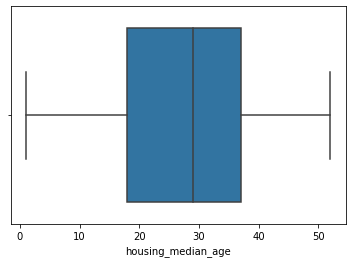

In [12]:
sns.boxplot(df['housing_median_age'])
plt.show()   

In [14]:
def median_imputation(feature):
    for i in feature:

        q1 = feature.quantile(0.25)
        q3 = feature.quantile (0.75)

        iqr = q3-q1

        Lower_tail = q1 - 1.5 * iqr

        Upper_tail = q3 + 1.5 * iqr

        if i > Upper_tail or i < Lower_tail:

            feature = feature.replace(i, np.median (feature))

    sns.boxplot(feature)

In [15]:
def mean_imputation(feature):
    
    for i in feature:
    
        q1 = feature.quantile(0.25)
        q3 = feature.quantile (0.75)

        iqr = q3-q1

        Lower_tail = q1 - 1.5 * iqr

        Upper_tail = q3 + 1.5 * iqr

        if i > Upper_tail or i < Lower_tail:
            
            feature = feature.replace(i, np.mean (feature))
       
    sns.boxplot(feature)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


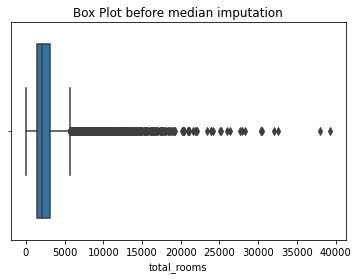

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


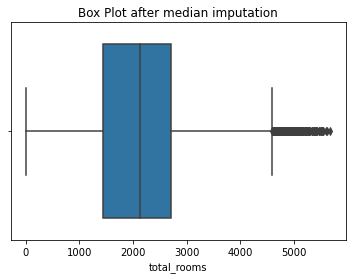

In [16]:
sns.boxplot(df['total_rooms'])
plt.title("Box Plot before median imputation") 
plt.show()

median_imputation(df['total_rooms'])

plt.title("Box Plot after median imputation") 
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


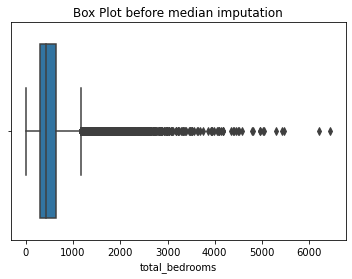

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


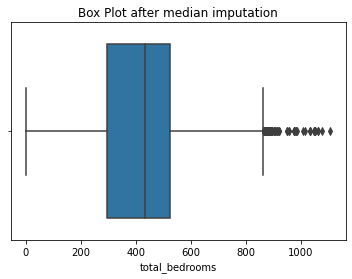

In [17]:
sns.boxplot(df['total_bedrooms'])
plt.title("Box Plot before median imputation") 
plt.show()

median_imputation(df['total_bedrooms'])

plt.title("Box Plot after median imputation") 
plt.show()


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


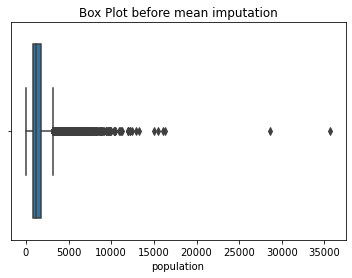

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


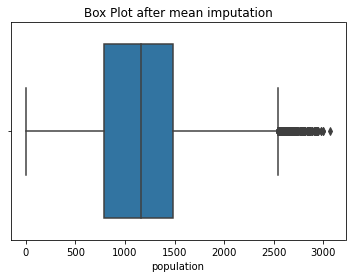

In [18]:
sns.boxplot(df['population'])
plt.title("Box Plot before mean imputation") 
plt.show()

mean_imputation(df['population'])

plt.title("Box Plot after mean imputation") 
plt.show()


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


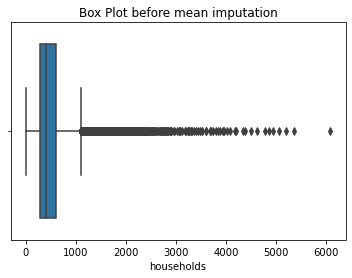

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


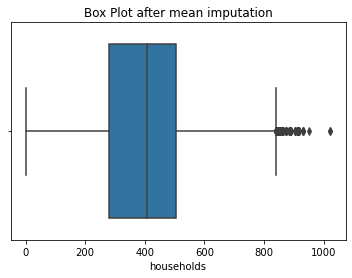

In [19]:
sns.boxplot(df['households'])
plt.title("Box Plot before mean imputation") 
plt.show()

mean_imputation(df['households'])

plt.title("Box Plot after mean imputation") 
plt.show()

### 3. Data Visualization

### 3.1 Visualizing Correlation between Variables through Heatmap

<AxesSubplot:>

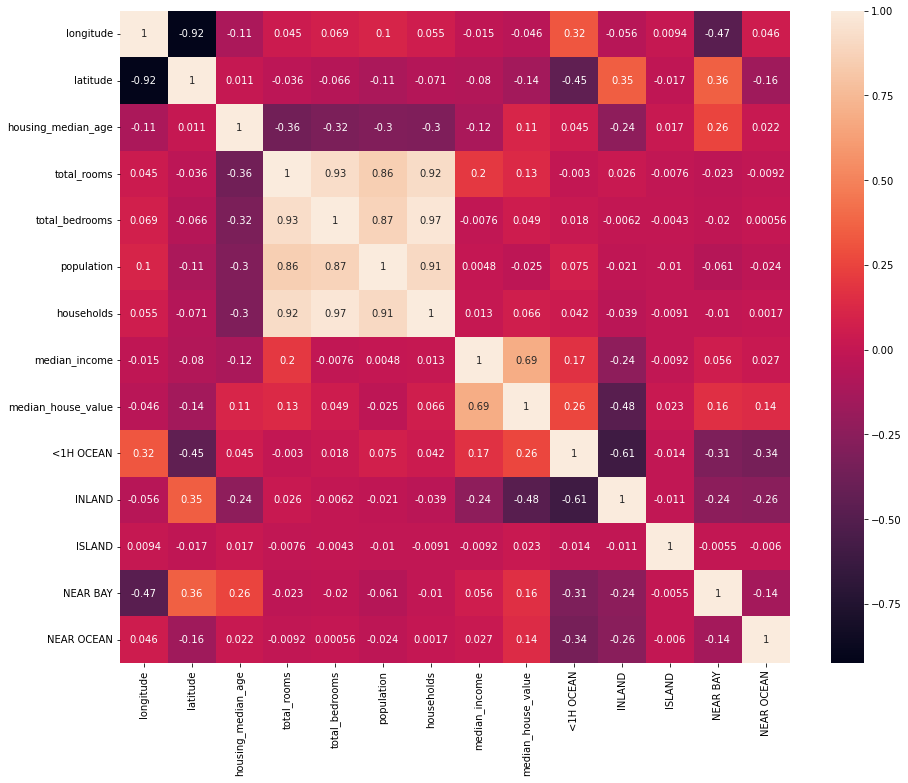

In [20]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot=True)

In [21]:
df.corr().sort_values(ascending=False, by = 'median_house_value').median_house_value

median_house_value    1.000000
median_income         0.688075
<1H OCEAN             0.256617
NEAR BAY              0.160284
NEAR OCEAN            0.141862
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049457
ISLAND                0.023416
population           -0.024650
longitude            -0.045967
latitude             -0.144160
INLAND               -0.484859
Name: median_house_value, dtype: float64

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>,
        <AxesSubplot:title={'center':'total_rooms'}>],
       [<AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>],
       [<AxesSubplot:title={'center':'median_house_value'}>,
        <AxesSubplot:title={'center':'<1H OCEAN'}>,
        <AxesSubplot:title={'center':'INLAND'}>,
        <AxesSubplot:title={'center':'ISLAND'}>],
       [<AxesSubplot:title={'center':'NEAR BAY'}>,
        <AxesSubplot:title={'center':'NEAR OCEAN'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

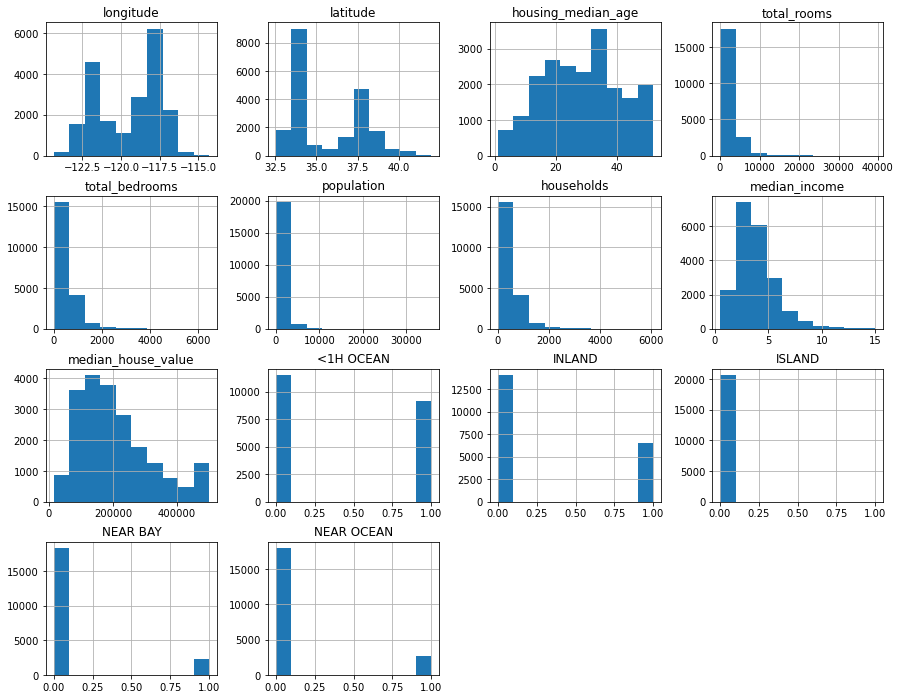

In [22]:
df.hist(figsize=(15,12))

<AxesSubplot:>

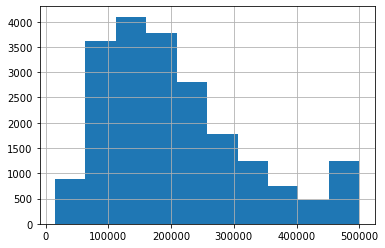

In [23]:
df.median_house_value.hist()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='median_house_value', ylabel='Density'>

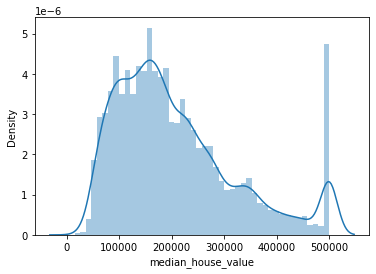

In [24]:
sns.distplot(df.median_house_value)

### 3.2 Eliminating Correlated Variables

<AxesSubplot:>

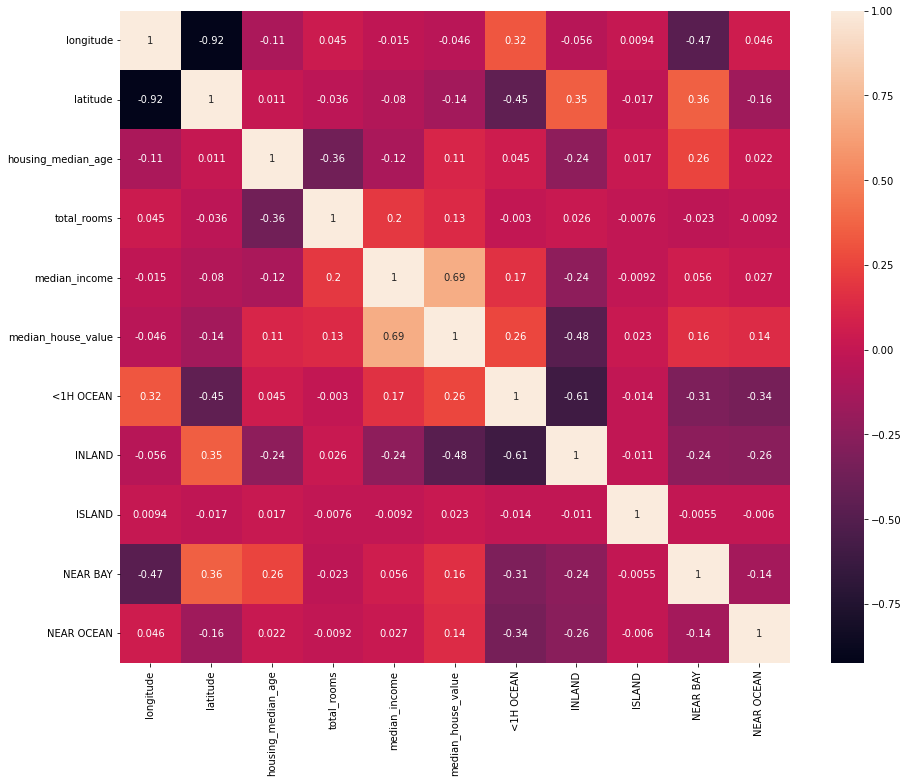

In [25]:
new_df = df.drop(['total_bedrooms', 'households', 'population'], axis=1)
plt.figure(figsize=(15,12))
sns.heatmap(new_df.corr(), annot=True)

### 4. Data Scaling

In [26]:
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
new_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'median_income', 'median_house_value', '<1H OCEAN', 'INLAND', 'ISLAND',
       'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')

In [27]:
feature = new_df.drop(['median_house_value'], axis=1)
label = new_df.median_house_value

In [28]:
featureT = scaler.fit_transform(feature.values)
labelT = scaler.fit_transform(new_df.median_house_value.values.reshape(-1,1)).flatten()

In [29]:
featureT

array([[-1.32783522,  1.05254828,  0.98214266, ..., -0.01556621,
         2.83074203, -0.38446649],
       [-1.32284391,  1.04318455, -0.60701891, ..., -0.01556621,
         2.83074203, -0.38446649],
       [-1.33282653,  1.03850269,  1.85618152, ..., -0.01556621,
         2.83074203, -0.38446649],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.01556621,
        -0.35326426, -0.38446649],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.01556621,
        -0.35326426, -0.38446649],
       [-0.83369581,  1.75014627, -1.00430931, ..., -0.01556621,
        -0.35326426, -0.38446649]])

In [30]:
labelT

array([ 2.12963148,  1.31415614,  1.25869341, ..., -0.99274649,
       -1.05860847, -1.01787803])

### 5. Applying Models

In [46]:
from sklearn.model_selection import train_test_split
feature_train, feature_test,label_train, label_test = train_test_split(featureT,labelT, test_size=0.2, random_state=19)               

### 5.1 Linear Regression 

In [32]:
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
linear_reg = linear_model.LinearRegression()
linear_reg.fit(feature_train,label_train)
r2_score(linear_reg.predict(feature_train),label_train)

0.36341580818024244

In [47]:
cross_val_score(linear_reg, feature_train,label_train, cv=10) 

array([0.63871111, 0.5922299 , 0.60123576, 0.60557053, 0.59529249,
       0.59122844, 0.59451763, 0.61316567, 0.62297544, 0.63726137])

In [44]:
reg_score = r2_score(linear_reg.predict(feature_test),label_test) 
reg_score

0.3558234805900484

### 5.2 Random Forest

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
forest_reg = RandomForestRegressor()

In [35]:
forest_reg.fit(feature_train,label_train)

RandomForestRegressor()

In [36]:
r2_score(forest_reg.predict(feature_train),label_train)

0.971539225182093

In [37]:
cross_val_score(forest_reg, feature_train, label_train, cv=10)

array([0.82520022, 0.81183818, 0.7956691 , 0.81076305, 0.830716  ,
       0.80683707, 0.81714131, 0.82374478, 0.80351727, 0.83266565])

In [38]:
forest_score = r2_score(forest_reg.predict(feature_test),label_test) 
forest_score

0.7737776903467373

### 5.3 Decision Tree

In [39]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(feature_train,label_train)

DecisionTreeRegressor()

In [40]:
r2_score(tree_reg.predict(feature_train),label_train)

1.0

In [41]:
cross_val_score(tree_reg, feature_train, label_train, cv=10)

array([0.65629157, 0.67202912, 0.60230315, 0.62401078, 0.6640083 ,
       0.6664716 , 0.68996444, 0.6524777 , 0.60307227, 0.66010406])

In [42]:
tree_score = r2_score(tree_reg.predict(feature_test),label_test) 
tree_score

0.6407461159081298

In [45]:
data = [reg_score, tree_score, forest_score]
index = ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor']
pd.DataFrame(data, index=index, columns=['Scores']).sort_values(ascending = False, by=['Scores'])

,Scores
Random Forest Regressor,0.773778
Decision Tree Regressor,0.640746
Linear Regression,0.355823
